In [67]:
global lvls
global language
language='ENG'

In [68]:
import sqlite3
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

class Person:
    def __init__(self, name, age, lvl, gender):
        self.name = name
        self.age = age
        self.lvl = lvl
        self.gender = gender
    
    def __str__(self):
        return f"{self.name}, {self.age} years old, {self.lvl}, {self.gender}"
    

Макс длина послед-ти: 101


Text(0, 0.5, 'Вероятность')

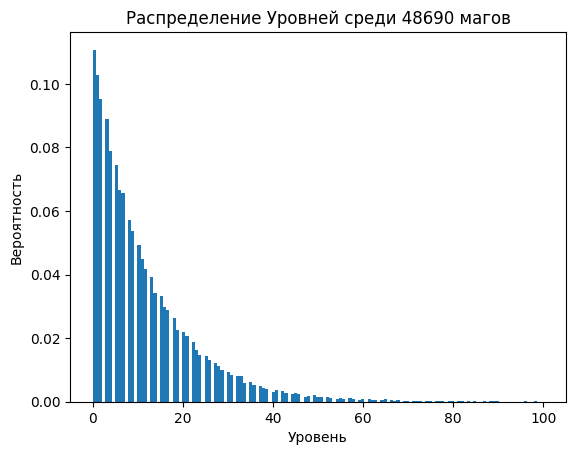

In [69]:
def sequence(mas): # Выводит последний элемент списка, находящийся внутри последовательности натуральных чисел, состоящих из уникальных чисел
       mas=list(set(mas))
       mas.sort()
       for i in range(len(mas)):
              if i!=mas[i]:
                     return mas[i-1]
       return i


#Создание распределенных по exp() чисел от 0 до 100
checker=-1
# size_rand=10000
size_rand=40000
while checker<100:
       r = expon.rvs(size=size_rand)*12
       lvls=list(map(int,r))
       checker=sequence(lvls)
       size_rand+=100
       # print('------')
       # print(max(lvls))
print(f"Макс длина послед-ти: {checker}")

#Ограничение распределение до 100 lvl.
def minus100(x):
       if x<=100:
              return True
       else:
              return False
lvls=[i for i in filter(minus100, lvls)]


#Построение графика
fig, ax = plt.subplots(1, 1)
ax.hist(lvls, density=True, bins='auto')
plt.title(f'Распределение Уровней среди {len(lvls)} магов')
plt.xlabel('Уровень')
plt.ylabel('Вероятность')

In [70]:
#Распределение по десяткам
def find_n(x,n=2):
    if x>=10*(n-1) and x<10*n:
        return True
    else:
        return False
for q in range(1,11):
    seqs=[i for i in filter(lambda seq: find_n(seq,n=q), lvls)] #lambda нужна чтобы вставить в вызывающуюся фукнцию дополнительную переменную (обычно filter не позволяет это сделать)
    print(f"heroes in range from {10*(q-1)} to {10*(q)}: {len(seqs)}")

heroes in range from 0 to 10: 27435
heroes in range from 10 to 20: 12083
heroes in range from 20 to 30: 5301
heroes in range from 30 to 40: 2213
heroes in range from 40 to 50: 915
heroes in range from 50 to 60: 400
heroes in range from 60 to 70: 199
heroes in range from 70 to 80: 87
heroes in range from 80 to 90: 36
heroes in range from 90 to 100: 19


In [71]:
def GeneratorPersons(nums=1,stage=-1):
    import random
    from pynames import GENDER, LANGUAGE
    from pynames.generators.elven import DnDNamesGenerator

    elven_generator = DnDNamesGenerator()   

    #primary data
    genders=['Male','Female']

    ages=[]
    mas=[i for i in range(15,20)]
    ages.append(mas)
    mas=[i for i in range(20,25)]
    ages.append(mas)
    mas=[i for i in range(25,30)]
    ages.append(mas)
    mas=[i for i in range(30,35)]
    ages.append(mas)
    mas=[i for i in range(35,40)]
    ages.append(mas)
    mas=[i for i in range(40,60)]
    ages.append(mas)
    weights=[0]*6
    weights=[0.1,0.2,0.2,0.3,0.1,0.1]

    

    data=[]

    for c in range(nums):
        #GENDER
        gender=random.choices(genders, weights=[0.4,0.6],k=1)
        gender=gender[0]
        #NAME
        if gender=='Male':
            name=elven_generator.get_name_simple(GENDER.MALE)
        else:
            name=elven_generator.get_name_simple(GENDER.FEMALE)

        #LVL
        lvl=random.choice(lvls)

        #AGE
        age_stage=random.choices(ages, weights=weights,k=1)
        age_stage=age_stage[0]
        age=random.choice(age_stage)

        
        # Считывание данных и создание объекта Person
        person=[name,age,lvl,gender]
        data.append(person)
        
    return data

In [72]:

data=[]


In [73]:

data.append(GeneratorPersons(nums=10000))

In [74]:
data=data[0]
# print(data)

In [75]:
import pandas as pd
df=pd.DataFrame(data,columns=['Name','Age','LvL','Gender'])

In [76]:
df

,Name,Age,LvL,Gender
0,Eirariavin,30,14,Male
1,Lyelaara,17,5,Female
2,ual'Nailihnavain,28,0,Male
3,Arriryl,28,4,Female
4,Kethten,32,51,Female
...,...,...,...,...
9995,Selnal,57,1,Female
9996,Eravain,34,38,Female
9997,Reaha,46,4,Female
9998,Maieruilaira,24,14,Female


In [77]:
df[df.LvL>80]

,Name,Age,LvL,Gender
851,Lasalael,34,81,Female
1713,Nimith,30,96,Male
1762,Besvin,34,98,Female
2525,Jaavainii,31,89,Female
2859,Selulam,24,94,Female
3513,lia'Garharrath,26,87,Female
4317,Arnvia,23,82,Female
4976,Tyodarethil,25,87,Male
6629,Tiarohal,34,100,Male
7459,Elavinine,58,86,Female
